In [14]:
# Import NumPy for numerical operations and array handling
import numpy as np

# Import Pandas for data manipulation using DataFrames
import pandas as pd

# Load the built-in Breast Cancer dataset from sklearn
from sklearn.datasets import load_breast_cancer

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# StandardScaler is used to scale features to have mean = 0 and std = 1
from sklearn.preprocessing import StandardScaler

# Import Random Forest classifier for supervised learning
from sklearn.ensemble import RandomForestClassifier

# Import evaluation metrics: accuracy, classification report, confusion matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Seaborn is used for statistical data visualization
import seaborn as sns

# Matplotlib is the main library for plotting graphs
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV

In [16]:
import pandas as pd
data = pd.read_csv('C:/Users/almanahry/OneDrive/Documents/breast-cancer.csv')

data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
# Check if the 'id' column exists in the dataset
if 'id' in data.columns:
    # Drop the 'id' column since it does not contribute to model training
    data = data.drop('id', axis=1)


In [18]:
# Remove all rows that contain missing (NaN) values
data = data.dropna()


In [19]:
# Check if the 'diagnosis' column exists in the dataset
if 'diagnosis' in data.columns:
    # Convert diagnosis labels: Malignant (M) -> 1, Benign (B) -> 0
    data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})


In [20]:
# Separate the features (X) by dropping the target column
X = data.drop('diagnosis', axis=1)

# Store the target variable (diagnosis) in y
y = data['diagnosis']


In [21]:
# Split the data into training and testing sets
# 80% of the data is used for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [22]:
# Create a StandardScaler object to normalize the features
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler (no refitting)
X_test_scaled = scaler.transform(X_test)


In [23]:
# Create a Random Forest classifier with 100 trees
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)



RandomForestClassifier(random_state=42)

In [24]:
# Predict the target values for the test set
y_pred = model.predict(X_test_scaled)

# Calculate and print the accuracy of the model
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print a detailed classification report (precision, recall, f1-score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9649122807017544

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



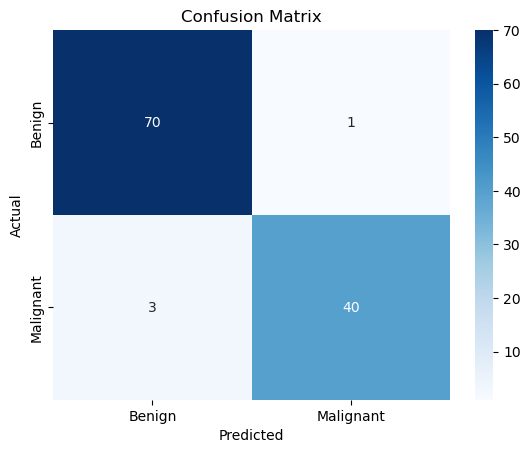

In [11]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap using Seaborn
sns.heatmap(
    cm,
    annot=True,           # Show numbers in each cell
    fmt='d',             # Format as integers
    cmap='Blues',         # Color map
    xticklabels=['Benign', 'Malignant'],  # X-axis labels
    yticklabels=['Benign', 'Malignant']   # Y-axis labels
)

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Display the plot
plt.show()



In [12]:
# Get feature importances from the trained Random Forest model
importances = model.feature_importances_

# Get the feature names from the dataset
feature_names = X.columns

# Create a Pandas Series with feature importances and sort them in descending order
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)


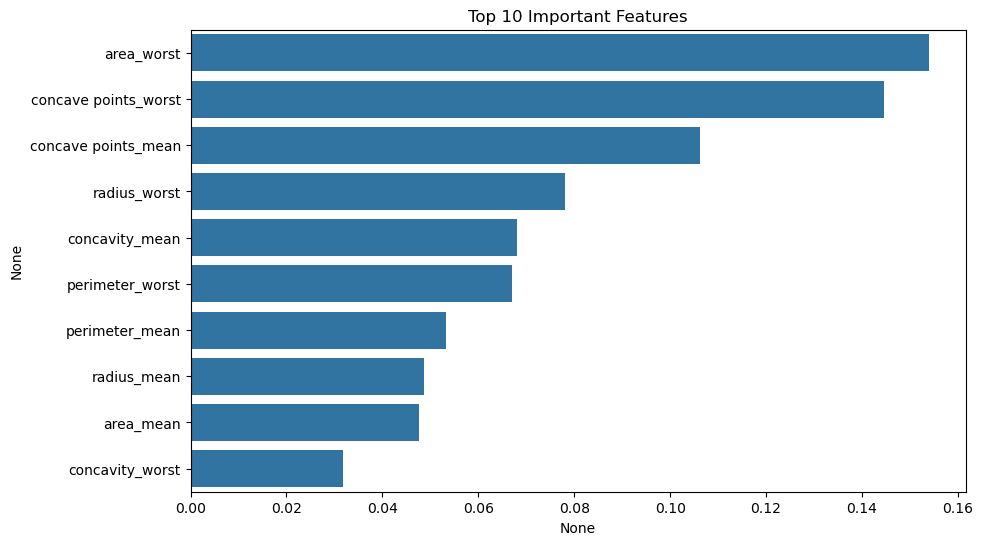

In [13]:
# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a horizontal bar plot of the top 10 feature importances
sns.barplot(x=feat_imp[:10], y=feat_imp.index[:10])

# Set the title of the plot
plt.title("Top 10 Important Features")

# Display the plot
plt.show()


In [14]:
# Import additional classification models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Create a dictionary of models to compare
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train each model and evaluate its accuracy on the test set
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Predict the target for the test set
    y_pred = model.predict(X_test_scaled)

    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)

    # Print the model name and its accuracy
    print(f"{name} Accuracy: {acc:.4f}")



Random Forest Accuracy: 0.9649
Logistic Regression Accuracy: 0.9737
Support Vector Machine Accuracy: 0.9825
K-Nearest Neighbors Accuracy: 0.9474


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

print("The Best Model:", grid.best_estimator_)
print("The Best Accuracy", grid.best_score_)

In [ ]:
# Import joblib for saving and loading models
import joblib

# Save the trained model to a file named 'breast_cancer_model.pkl'
joblib.dump(model, 'breast_cancer_model.pkl')




In [2]:
# Install Streamlit library to create interactive web apps for Python
!pip install streamlit


In [ ]:
# Plot histograms for all features in X to visualize their distributions
X.hist(bins=20, figsize=(20, 15))

# Add a main title to the figure
plt.suptitle("Feature Distributions")

# Display the plots
plt.show()

